<a href="https://colab.research.google.com/github/JanneWald/CS3960/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2: K-Nearest Neighbors

Make sure you have these libraries installed. Run the cell below to check and install them if needed.

In [ ]:
# Check and install required libraries
!pip install numpy matplotlib scikit-learn --quiet

In [ ]:
# Basic imports used in several parts (you will need more imports later)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Initial dataset for parts 1 and 2
X, y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=6, cluster_std=2)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Part 1: K-Nearest Neighbors in Numpy

In [ ]:
# Follow the HW instructions to make your own classifier in Numpy, evaluate its accuracy, and plot your results

# This function executes the core logic of KNN. Namely, it finds the k nearest
# neighbors to point, and then finds and returns the most common label among those k.
# Write a function that takes in a point, some data, and a parameter k,
# and returns the k closest points to the input
def predict_y(point, x_data, y_data, k):
  x_data_copy = x_data
  y_data_copy = y_data

  distances = np.linalg.norm(x_data_copy - point, axis=1)

  nearest_indices = np.argsort(distances)[:k]
  nearest_labels = y_data_copy[nearest_indices]

  counts = np.bincount(nearest_labels)
  majority = np.argmax(counts)
  return majority

In [ ]:
k = 4
y_predictions = []

for point in X_test:
  prediction = predict_y(point, X_train, y_train, k)
  y_predictions.append(prediction)

y_pred = np.array(y_predictions)

accuracy = np.mean(y_pred == y_test) # Boolean array based on if they are equal
print("Accuracy:", accuracy)


Accuracy: 0.91


/tmp/ipython-input-2014111749.py:8: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  test_scatter = plt.scatter(


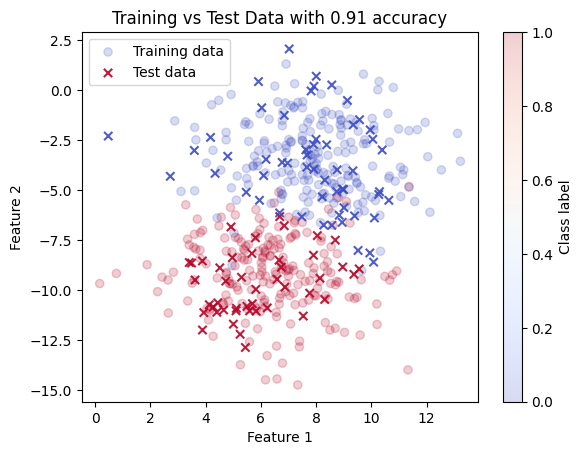

In [ ]:
# Plot training data
train_scatter = plt.scatter(
    X_train[:, 0], X_train[:, 1],
    c=y_train, cmap='coolwarm', alpha=0.2, label="Training data"
)

# Plot prediction/testing data
test_scatter = plt.scatter(
    X_test[:, 0], X_test[:, 1],
    c=y_pred, cmap='coolwarm', alpha=0.9, edgecolor='k', label="Test data", marker='x'
)

# I added colorbar to clarify label meaning
cbar = plt.colorbar(train_scatter)
cbar.set_label("Class label")

plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Training vs Test Data with {accuracy} accuracy")
plt.show()

# Part 2: K-Nearest Neighbors in Sklearn

---



In [ ]:
# Do the same analysis as part 1, but using KNeighborsClassifier from sklearn.neighbors
# Step 1. Build KNN
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred_sklearn = knn.predict(X_test)


In [ ]:
# Step 2. Calculate the Accuracy (>0.9)
accuracy = np.mean(y_pred_sklearn == y_test)
print("Accuracy:", accuracy)



Accuracy: 0.91


/tmp/ipython-input-3266574642.py:9: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  test_scatter = plt.scatter(


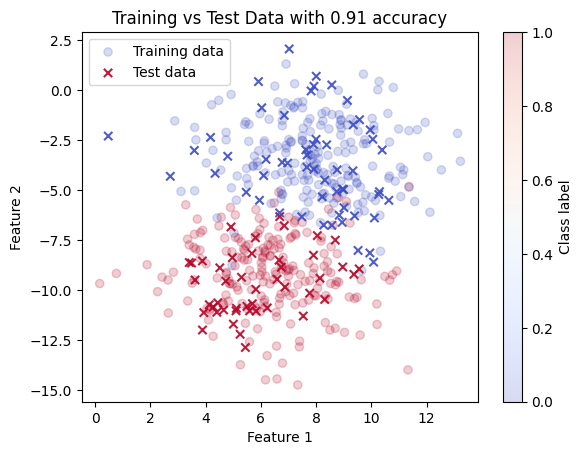

In [ ]:
# Step 3. Plot
# Plot training data
train_scatter = plt.scatter(
    X_train[:, 0], X_train[:, 1],
    c=y_train, cmap='coolwarm', alpha=0.2, label="Training data"
)

# Plot prediction/testing data
test_scatter = plt.scatter(
    X_test[:, 0], X_test[:, 1],
    c=y_pred_sklearn, cmap='coolwarm', alpha=0.9, edgecolor='k', label="Test data", marker='x'
)

# I added colorbar to clarify label meaning
cbar = plt.colorbar(train_scatter)
cbar.set_label("Class label")

plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Training vs Test Data with {accuracy} accuracy")
plt.show()

# Part 3: Beyond a simple case
---

In real life, things are typically more complicated than the example we’ve been practicing with. For example, data can be messier, and you have to make several decisions about details of your algorithm. In this part, we will see several examples of this.




/tmp/ipython-input-1787172649.py:26: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


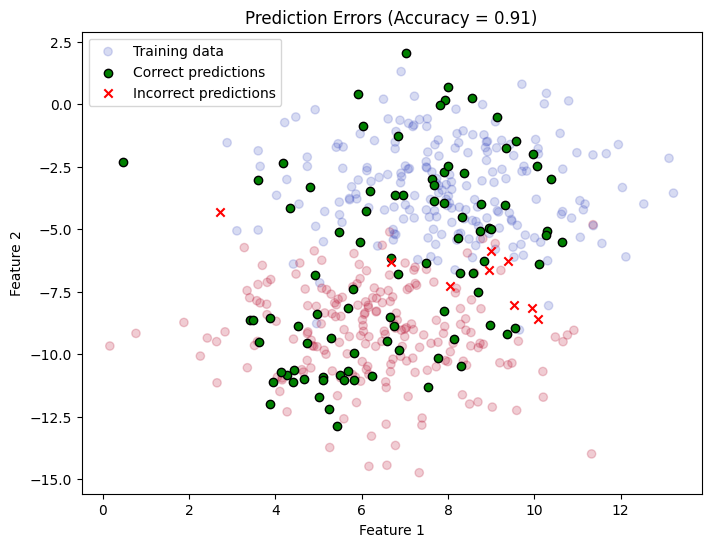

In [ ]:
# In Parts 1 and 2, your final scatter plot displays the predicted labels for each test point.
# However, we cannot tell which predictions are correct and which are incorrect.
# Make another scatter plot displaying the prediction errors.
# That is, the color of each test point should depend on whether the prediction was correct or incorrect
# (make sure to also show the training points, as before).
# TODO: Plot the figure

# Compare predicted vs actual labels
correct = y_pred == y_test

plt.figure(figsize=(8, 6))

# Plot training data
plt.scatter(
    X_train[:, 0], X_train[:, 1],
    c=y_train, cmap='coolwarm', alpha=0.2, label="Training data"
)

# Plot correct predictions (green)
plt.scatter(
    X_test[correct, 0], X_test[correct, 1],
    c="green", edgecolor="k", marker="o", label="Correct predictions"
)

# Plot incorrect predictions (red)
plt.scatter(
    X_test[~correct, 0], X_test[~correct, 1],
    c="red", edgecolor="k", marker="x", label="Incorrect predictions"
)

plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Prediction Errors (Accuracy = {accuracy:.2f})")
plt.show()


k = 1, Accuracy = 0.88


/tmp/ipython-input-3714703651.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


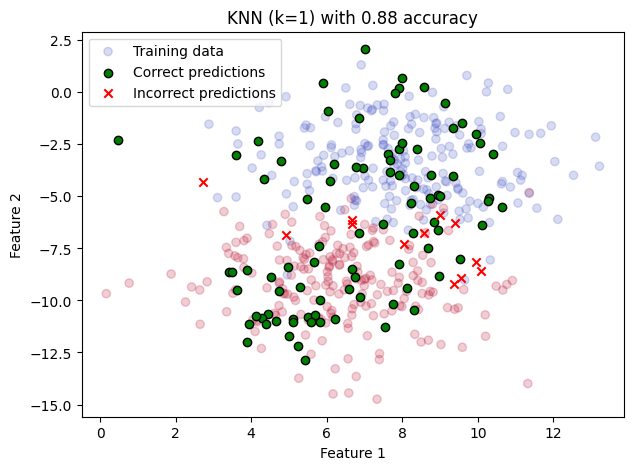

k = 3, Accuracy = 0.9


/tmp/ipython-input-3714703651.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


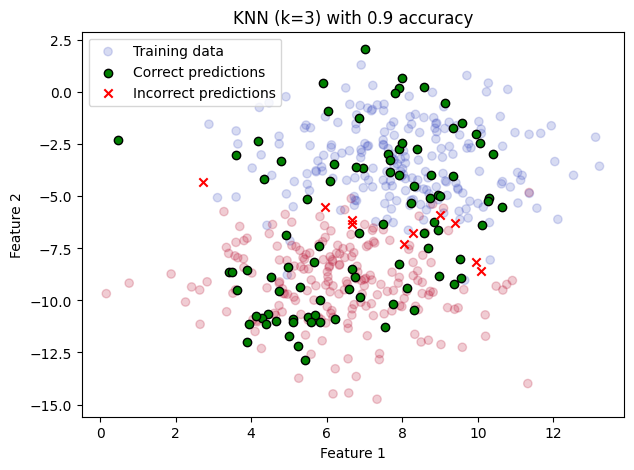

k = 5, Accuracy = 0.89


/tmp/ipython-input-3714703651.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


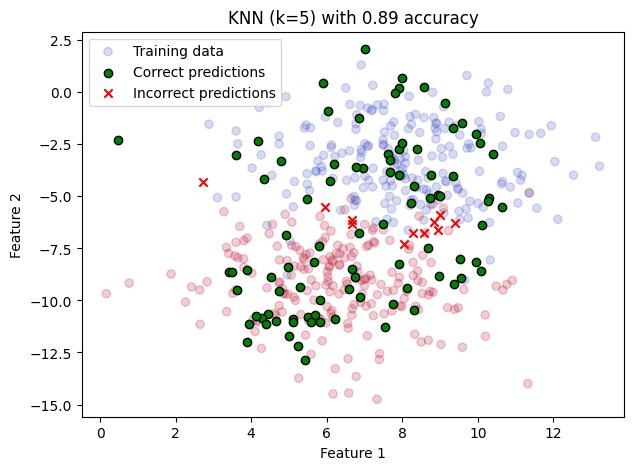

In [ ]:
#Now, we will experiment with varying values of k (the main parameter of the model).
#Using the same data as above, train 3 KNN models with k=1,3, and 5.
# For each, display its accuracy, and show a scatter plot of prediction errors.
# Notice which particular points are correct/incorrect for which values of k, and how the accuracy changes.
# TODO: Experiment with different values of k (1,3, and 5) for the data above.

for k in [1, 3, 5]:
    # Build and train classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = np.mean(y_pred == y_test)
    print(f"k = {k}, Accuracy = {accuracy}")

    correct = (y_pred == y_test)

    plt.figure(figsize=(7, 5))

    # Plot training data
    plt.scatter(
        X_train[:, 0], X_train[:, 1],
        c=y_train, cmap='coolwarm', alpha=0.2, label="Training data"
    )

    # Plot correct predictions
    plt.scatter(
        X_test[correct, 0], X_test[correct, 1],
        c="green", edgecolor="k", marker="o", label="Correct predictions"
    )

    # Plot incorrect predictions
    plt.scatter(
        X_test[~correct, 0], X_test[~correct, 1],
        c="red", edgecolor="k", marker="x", label="Incorrect predictions"
    )

    plt.legend()
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"KNN (k={k}) with {accuracy} accuracy")
    plt.show()

In [ ]:
# Write a few sentences describing how and why the predictions change for different values of k,
# and justifying which choice of k you think seems best for this dataset.
# TODO: Write a few sentences justifying the best choice of k.

# While chaking k, the decision boundaries of the KNN classifier change. The problem with a small k (like 1), the model is very sensitive to noise and outliers
# since each prediction depends on only a single neighbor. With an excessive k, model is too generalized,
# blurring the boundary between labels. Thats why we see most of the inaccuracies on the "fault line"

# For this dataset, an choice such as k=3 achieves a good balance, giving high accuracy (about 0.91). Although this data was mostly very clean.

/tmp/ipython-input-812098291.py:37: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


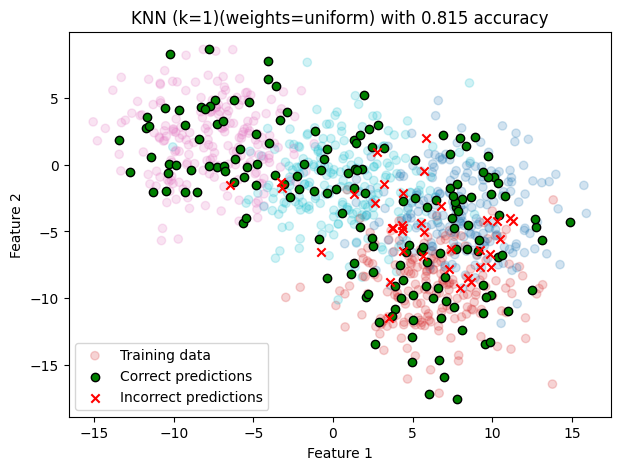

/tmp/ipython-input-812098291.py:37: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


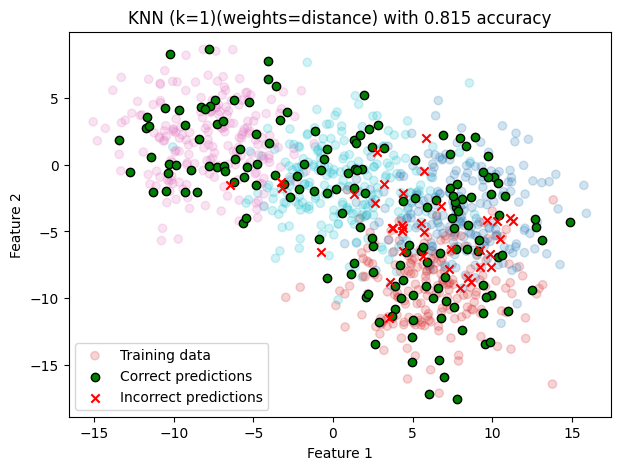

/tmp/ipython-input-812098291.py:37: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


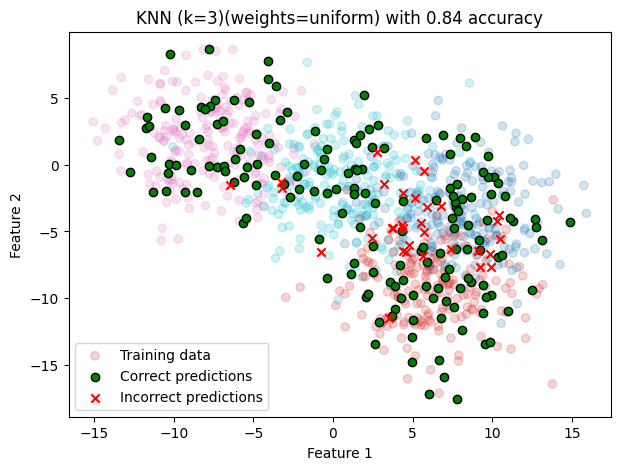

/tmp/ipython-input-812098291.py:37: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


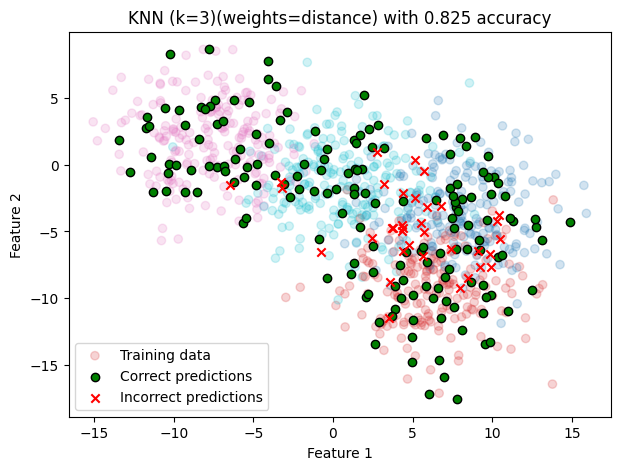

/tmp/ipython-input-812098291.py:37: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


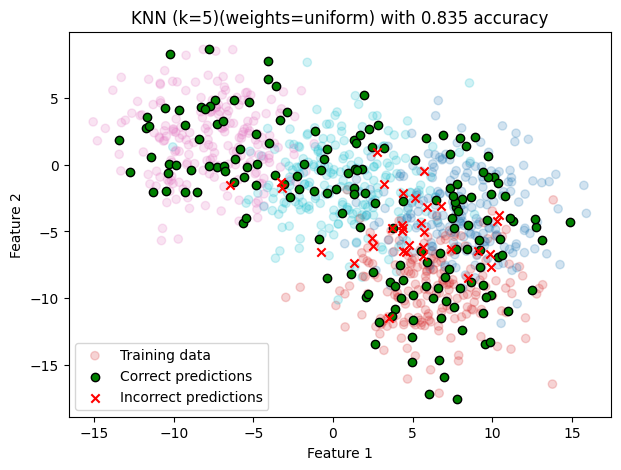

/tmp/ipython-input-812098291.py:37: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


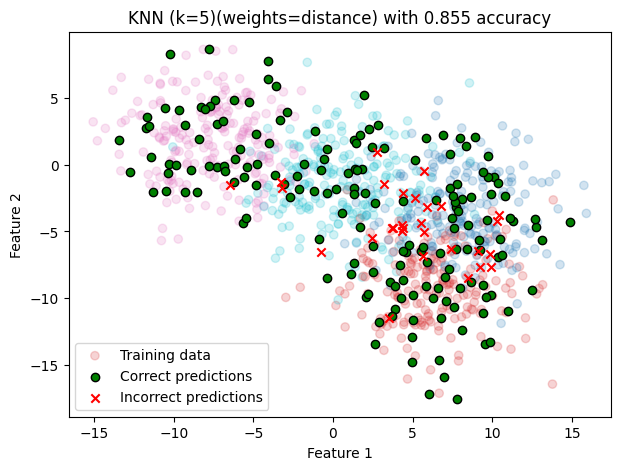

/tmp/ipython-input-812098291.py:37: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


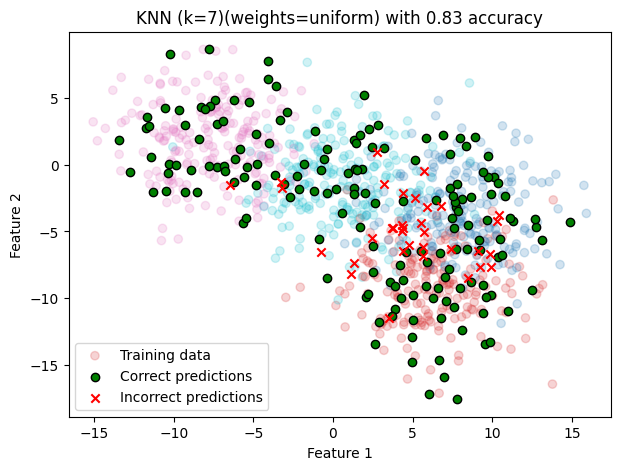

/tmp/ipython-input-812098291.py:37: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


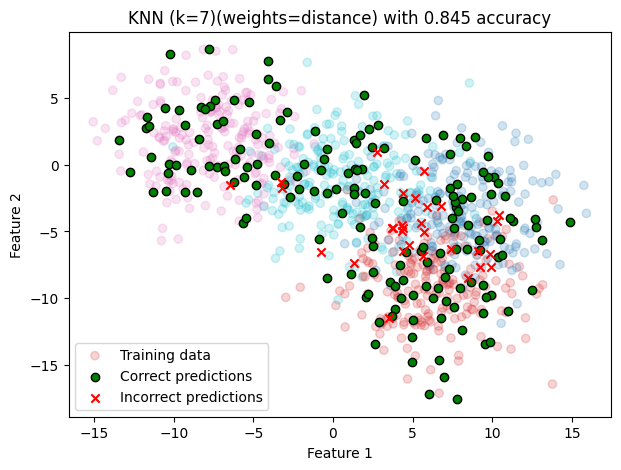

/tmp/ipython-input-812098291.py:37: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


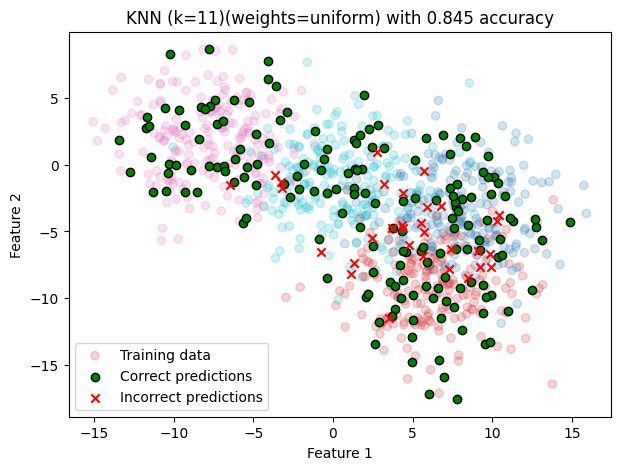

/tmp/ipython-input-812098291.py:37: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


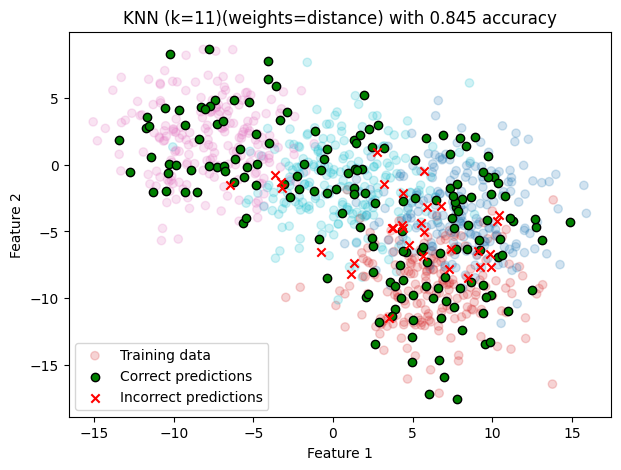

/tmp/ipython-input-812098291.py:37: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


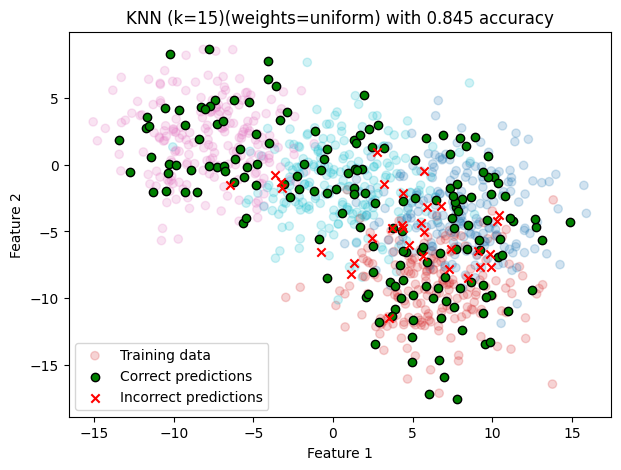

/tmp/ipython-input-812098291.py:37: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


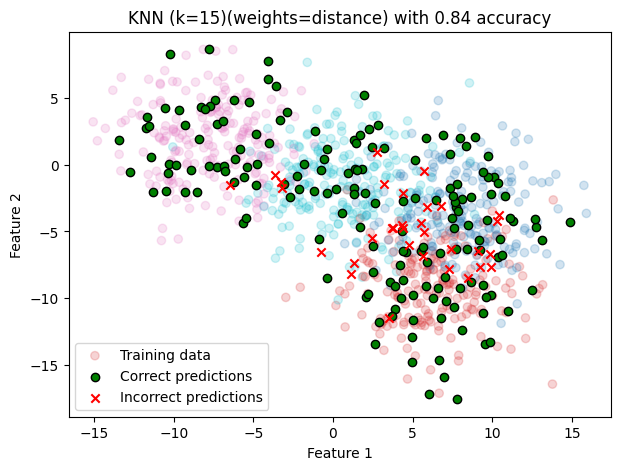



Summary of experiments:
k=1, weights=uniform → accuracy=0.815
k=1, weights=distance → accuracy=0.815
k=3, weights=uniform → accuracy=0.84
k=3, weights=distance → accuracy=0.825
k=5, weights=uniform → accuracy=0.835
k=5, weights=distance → accuracy=0.855
k=7, weights=uniform → accuracy=0.83
k=7, weights=distance → accuracy=0.845
k=11, weights=uniform → accuracy=0.845
k=11, weights=distance → accuracy=0.845
k=15, weights=uniform → accuracy=0.845
k=15, weights=distance → accuracy=0.84


In [ ]:
# Now, we will try a more complex example. Following the pattern above, train another KNN classifier (you may use sklearn) on the new provided dataset.
# Try several parameters to try to achieve the best accuracy possible
# (you can try various values of k, but also note that KNeighborsClassifier supports other options, which you may also experiment with).
# TODO: Try to train a good model for the following slightly more complicated dataset
X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=6, cluster_std=3)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameters to try
k_values = [1, 3, 5, 7, 11, 15]
weights_options = ["uniform", "distance"]

results = []

for k in k_values:
    for weights in weights_options:
        knn = KNeighborsClassifier(n_neighbors=k, weights=weights)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = np.mean(y_pred == y_test)
        results.append((k, weights, accuracy))

        # Plot training, everthing is the same as before...
        correct = (y_pred == y_test)
        plt.figure(figsize=(7, 5))
        plt.scatter(
            X_train[:, 0], X_train[:, 1],
            c=y_train, cmap="tab10", alpha=0.2, label="Training data"
        )
        # Plot correct prediction
        plt.scatter(
            X_test[correct, 0], X_test[correct, 1],
            c="green", edgecolor="k", marker="o", label="Correct predictions"
        )
        # Plot incorrect prediction
        plt.scatter(
            X_test[~correct, 0], X_test[~correct, 1],
            c="red", edgecolor="k", marker="x", label="Incorrect predictions"
        )
        plt.legend()

        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.title(f"KNN (k={k})(weights={weights}) with {accuracy} accuracy")
        plt.show()
        print("\n")

# Print summary of results
print("Summary of experiments:")
for k, weights, accuracy in results:
    print(f"k={k}, weights={weights} → accuracy={accuracy}")

Write a paragraph, with supporting code and plots, describing a good model for this dataset.

From my testing of k neighbors [1..15] along with checking [uniform, distance] weighting. The highest accuracy(0.855) came from k=5 and distance based weighting. This makes sense for the data we plotted for a few reasons.

As mentioned in the earlier part a k of around 3-5 usually results in a higher degree of accuracy because it filters a good chunk of outliers and noise. Secondly, distance based weighting helps differentiate confusing data points on the seperation line. In our data where we have overlap of blue and red labels, weighting your neighbors by who is closest results in more accurate prediction rather than majority rule.

Here are differences of a good k and weighting.


```python
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform')
```
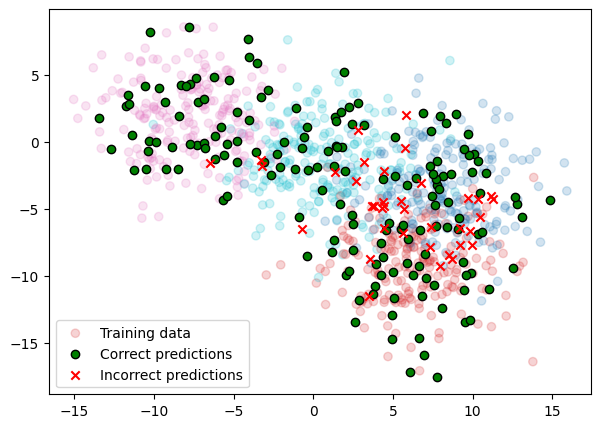

```python
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
```
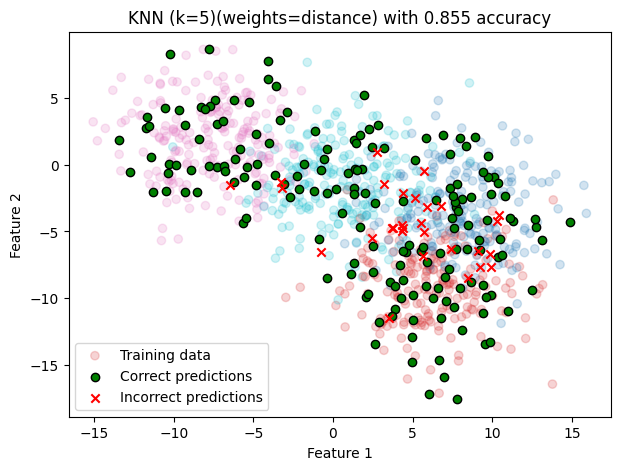


# Part 4: A real dataset

k=1, weights=uniform, mean accuracy=0.960, std=0.025
k=1, weights=distance, mean accuracy=0.960, std=0.025
k=3, weights=uniform, mean accuracy=0.967, std=0.021
k=3, weights=distance, mean accuracy=0.967, std=0.021
k=5, weights=uniform, mean accuracy=0.973, std=0.025
k=5, weights=distance, mean accuracy=0.967, std=0.037
k=7, weights=uniform, mean accuracy=0.980, std=0.016
k=7, weights=distance, mean accuracy=0.980, std=0.016
k=9, weights=uniform, mean accuracy=0.973, std=0.025
k=9, weights=distance, mean accuracy=0.973, std=0.025
k=11, weights=uniform, mean accuracy=0.980, std=0.027
k=11, weights=distance, mean accuracy=0.987, std=0.016
k=13, weights=uniform, mean accuracy=0.973, std=0.025
k=13, weights=distance, mean accuracy=0.980, std=0.016
k=15, weights=uniform, mean accuracy=0.967, std=0.030
k=15, weights=distance, mean accuracy=0.973, std=0.025
k=17, weights=uniform, mean accuracy=0.967, std=0.030
k=17, weights=distance, mean accuracy=0.973, std=0.025
k=19, weights=uniform, mean a

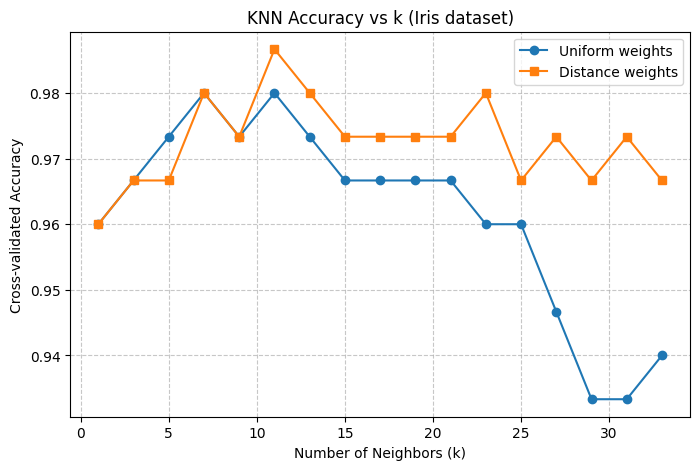


Best parameters: (11, 'distance') with accuracy: 0.9866666666666667


In [ ]:
# TODO: try to train a *good* model for the following real world dataset.
# NOTE, this data is significantly messier than above. For example, the different features have very different ranges of values!
# We will talk more about this in class, but for now, try to find a reasonable classifier, you may also (optionally) normalize the feature values if you'd like to look more into that
data = load_iris()
X = data.data
y = data.target

# Splitting training/test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing because you said we could idk...)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

k_values = range(1, 35, 2)
weight_options = ["uniform", "distance"]

best_accuracy = 0
best_params = None

uniform_accuracies = []
distance_accuracies = []

for k in k_values:
    for weight in weight_options:
        knn = KNeighborsClassifier(n_neighbors=k, weights=weight)
        scores = cross_val_score(knn, X, y, cv=5)  # 5-fold cross-validation
        accuracy = np.mean(scores)
        print(f"k={k}, weights={weight}, mean accuracy={accuracy:.3f}, std={np.std(scores):.3f}")


        # knn.fit(X_train, y_train)
        # y_pred = knn.predict(X_test)
        # accuracy = np.mean(y_pred == y_test)
        # print(f"k={k}, weights={weight}, Accuracy={accuracy}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = (k, weight)

        if weight == 'distance':
          distance_accuracies.append(accuracy)
        else:
          uniform_accuracies.append(accuracy)

# Plot accuracies as function of k
plt.figure(figsize=(8,5))
plt.plot(k_values, uniform_accuracies, marker="o", label="Uniform weights")
plt.plot(k_values, distance_accuracies, marker="s", label="Distance weights")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-validated Accuracy")
plt.title("KNN Accuracy vs k (Iris dataset)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

print("\nBest parameters:", best_params, "with accuracy:", best_accuracy)


I had quite the story when it came to finding a good model. The first issue
was a mysterious data set.
I split the dataset as always:
```python
# Split into training/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

I had normalized the data like so:
```python
# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```
Fitting the data against k{1..7}/weight{uniform, distance} with the test/train split I got the following results:
```
k=1, weights=uniform, Accuracy=1.0
k=1, weights=distance, Accuracy=1.0
k=3, weights=uniform, Accuracy=1.0
k=3, weights=distance, Accuracy=1.0
k=5, weights=uniform, Accuracy=1.0
k=5, weights=distance, Accuracy=1.0
k=7, weights=uniform, Accuracy=1.0
k=7, weights=distance, Accuracy=1.0
k=9, weights=uniform, Accuracy=1.0
k=9, weights=distance, Accuracy=1.0
k=11, weights=uniform, Accuracy=1.0
k=11, weights=distance, Accuracy=1.0
k=13, weights=uniform, Accuracy=1.0
k=13, weights=distance, Accuracy=1.0
k=15, weights=uniform, Accuracy=1.0
k=15, weights=distance, Accuracy=1.0

Best parameters: (1, 'uniform') with accuracy: 1.0
```
This seemed wrong, so I treid removing the normalizing:
```
k=1, weights=uniform, Accuracy=1.0
k=1, weights=distance, Accuracy=1.0
k=3, weights=uniform, Accuracy=1.0
k=3, weights=distance, Accuracy=1.0
k=5, weights=uniform, Accuracy=1.0
k=5, weights=distance, Accuracy=1.0
k=7, weights=uniform, Accuracy=0.9666666666666667
k=7, weights=distance, Accuracy=1.0
k=9, weights=uniform, Accuracy=1.0
k=9, weights=distance, Accuracy=1.0
k=11, weights=uniform, Accuracy=1.0
k=11, weights=distance, Accuracy=1.0
k=13, weights=uniform, Accuracy=1.0
k=13, weights=distance, Accuracy=1.0
k=15, weights=uniform, Accuracy=1.0
k=15, weights=distance, Accuracy=1.0

Best parameters: (1, 'uniform') with accuracy: 1.0
```
Not much difference...

I had some luck by changing the splitting values for our X, y data but it was very tedious. So I did some research into cross validation analysis also from `sklearn`. With this tool I was able to fold the data 5 ways, training on 4, testing on 1, and cycling through every combination until we have a good average. With this testing strategy I generated these values

```
k=1, weights=uniform, mean accuracy=0.960, std=0.025
k=1, weights=distance, mean accuracy=0.960, std=0.025
k=3, weights=uniform, mean accuracy=0.967, std=0.021
k=3, weights=distance, mean accuracy=0.967, std=0.021
k=5, weights=uniform, mean accuracy=0.973, std=0.025
k=5, weights=distance, mean accuracy=0.967, std=0.037
k=7, weights=uniform, mean accuracy=0.980, std=0.016
k=7, weights=distance, mean accuracy=0.980, std=0.016
k=9, weights=uniform, mean accuracy=0.973, std=0.025
k=9, weights=distance, mean accuracy=0.973, std=0.025
k=11, weights=uniform, mean accuracy=0.980, std=0.027
k=11, weights=distance, mean accuracy=0.987, std=0.016
k=13, weights=uniform, mean accuracy=0.973, std=0.025
k=13, weights=distance, mean accuracy=0.980, std=0.016
k=15, weights=uniform, mean accuracy=0.967, std=0.030
k=15, weights=distance, mean accuracy=0.973, std=0.025
k=17, weights=uniform, mean accuracy=0.967, std=0.030
k=17, weights=distance, mean accuracy=0.973, std=0.025
k=19, weights=uniform, mean accuracy=0.967, std=0.030
k=19, weights=distance, mean accuracy=0.973, std=0.025
k=21, weights=uniform, mean accuracy=0.967, std=0.030
k=21, weights=distance, mean accuracy=0.973, std=0.025
k=23, weights=uniform, mean accuracy=0.960, std=0.033
k=23, weights=distance, mean accuracy=0.980, std=0.016

Best parameters: (11, 'distance') with accuracy: 0.9866666666666667
```

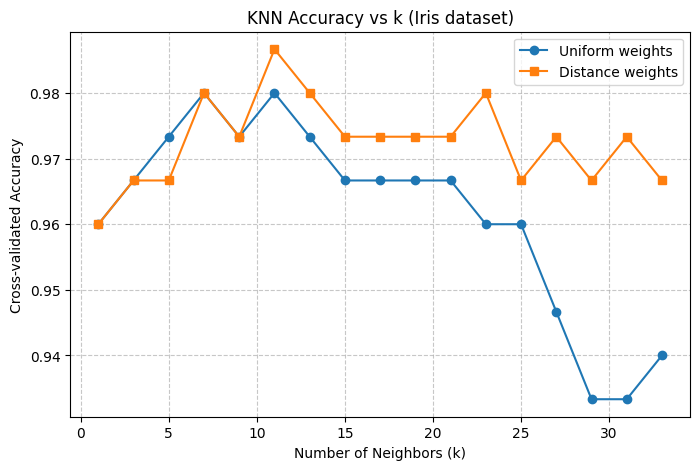

From the data we can make some obious assertions. As me we increase k, (close to 0) the accuracy for both weighting models of kNN increases. This apexes around 5-11 k nearest neighbors. This is followed by a decrease of both approaches as k increases further, making the data more and more generic. Interestingly, the weighting affected the most is the unfirom type. This is easily explainable, the distance based measurement seemingly negates a higher k by reducing the weight of the further neighbors. Assuming a datapoint is closely surrounded by 4 neighbors, if k is exceedingly high (like 32), the distance based weighting is going to take **primary concern** from those 4 close data points.

From my testing here, I have come to the conclusion that the best accuracy was generated from a k of 11, with the reliable distance weighting. It made an impressive 98% accuracy model, accross many different folds.